# Usenet Analysis
by Domas Budrys

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import csv
import re
from wordcloud import WordCloud

In [2]:
#Question 1

# Lists for all IDs and set them to 0

all_from = []

#rec.arts.origami.txt
rec_arts_column = []

#rec.food.chocolate.txt
rec_food_column = []

#comp.org.acm.txt
comp_org_column = []

#linux.dev.kernel.txt
linux_dev_column = []

#sci.fractals.txt
sci_column = []


def countMessages(fileName, columnName, outputName):
 
    with open(fileName, "r") as dataIn:  

            for i in dataIn:
                m = re.match(r"^(From) (-?\d+)$", i)

                if m:
                    clean = i.strip('\n')
                    columnName.append(clean)

                    #list to count All
                    all_from.append(outputName)
                    
    outputString = outputName+ "  Count = " +str(len(columnName))
    return outputString


## Question 1

To complete this questions I have created a list for each file that will store each **From** entry in the file. Then, we create a function **countMessages** that takes in 3 parameters: *fileName, columnName, outputName.* 
* fileName - is used to specify which file needs to be opened
* columnName - is used to specify in which list **Form** entries will be stored
* outputName - is used to assign a wanted name to which will be shown in print()

After all entries are stored to the appropirate list, the length on the list is calculated by *len(columnName)* and assigned oto the outputString which is return by the **countMessages** function


In [3]:
#Question 1 (Continued)

print (countMessages("rec.arts.origami.txt", rec_arts_column, "Rec.Arts"))
print (countMessages("rec.food.chocolate.txt", rec_food_column, "Rec.Food"))
print (countMessages("comp.org.acm.txt", comp_org_column, "Comp.Org.ACM"))
print (countMessages("linux.dev.kernel.txt", linux_dev_column, "Linux.Dev.Kernel"))
print (countMessages("sci.fractals.txt", sci_column, "Sci.Factals"))

Rec.Arts  Count = 3549
Rec.Food  Count = 17615
Comp.Org.ACM  Count = 6246
Linux.Dev.Kernel  Count = 34404
Sci.Factals  Count = 25733


### Question 1 (Continued)

**countMessages** is executed for each text file that we are preforming analysis for. Then, *outputString* is being returned

Text(0.5,1,'Count for All Messages in Each Archive')

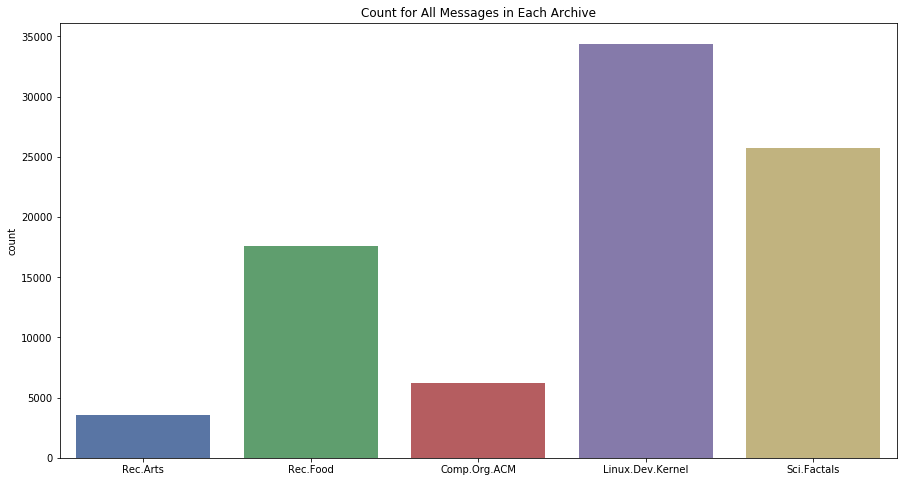

In [4]:
#Question 1 (Continued)

plt.figure(figsize=(15,8))
plot1 = sns.countplot(all_from, palette="deep")
plot1.set_title("Count for All Messages in Each Archive")

### Question 1 (Continued

Count plot of all messages in each archive is displayed above

In [5]:
#Question 2 
all_lines = []

#rec.arts.origami.txt
rec_arts_lines_column = []
rec_arts_lines_numbers = []

#rec.food.chocolate.txt
rec_food_lines_column = []
rec_food_lines_numbers = []

#comp.org.acm.txt
comp_org_lines_column = []
comp_org_lines_numbers = []

#linux.dev.kernel.txt
linux_dev_lines_column = []
linux_dev_lines_numbers = []

#sci.fractals.txt
sci_lines_column = []
sci_lines_numbers = []

def countLines(fileName, columnName, numbersName, outputName):
    
    with open(fileName, "r") as dataIn:  

        for i in dataIn:
            m = re.match(r"^(Lines:) (-?\d+)$", i)

            if m:
                number = i.split()
                columnName.append(number)


        for i in columnName:
            numbersName.append(int(i[1]))

    average = sum(numbersName) / len(numbersName)


    for i in range(int(average)):
        all_lines.append(outputName)
        
    outputString = outputName+ "  Average Number = " +str(round(average, 2))
    return outputString


## Question 2 

At first, we initialize all the necessary list to complete this question. Then, function **countLines** is created which takes in values such as *fileName, columnName, numbersName, outputName*
* fileName - is used to specify which file needs to be opened
* columnName - is used to specify in which list **Lines:** entries will be stored in string values
* numbersName - is used to specify in which list **Lines:** entries will be stored in integer value in order to calculate the average for each file
* outputName - is used to assign a wanted name to which will be shown in print()

The values in *columnName* are stored in two-dimensional array. Then, by using for loop we are able to get the second values of *columnName* list and append them to *numbersName* list which stores all the values in integer type. Then, we are able to calculate the average for each file and assign that value of same title to the list *all_lines*

    for i in range(int(average)):
        all_lines.append(outputName)
        
*all_lines* list is used to calculate values in countplot


In [6]:
print(countLines("rec.arts.origami.txt", rec_arts_lines_column, rec_arts_lines_numbers, "Rec.Arts"))
print(countLines("rec.food.chocolate.txt", rec_food_lines_column, rec_food_lines_numbers, "Rec.Food"))
print(countLines("comp.org.acm.txt", comp_org_lines_column, comp_org_lines_numbers, "Comp.Org.ACM"))
print(countLines("linux.dev.kernel.txt", linux_dev_lines_column, linux_dev_lines_numbers, "Linux.Dev.Kernel"))
print(countLines("sci.fractals.txt", sci_lines_column, sci_lines_numbers, "Sci.Factals"))

Rec.Arts  Average Number = 48.37
Rec.Food  Average Number = 41.46
Comp.Org.ACM  Average Number = 69.65
Linux.Dev.Kernel  Average Number = 36.37
Sci.Factals  Average Number = 70.94


### Question 2 (Continued)

**countLines** is executed for each text file that we are preforming analysis for. Then, *outputString* is being returned in appropriate format

Text(0.5,1,'Average for All Lines in Each Archive')

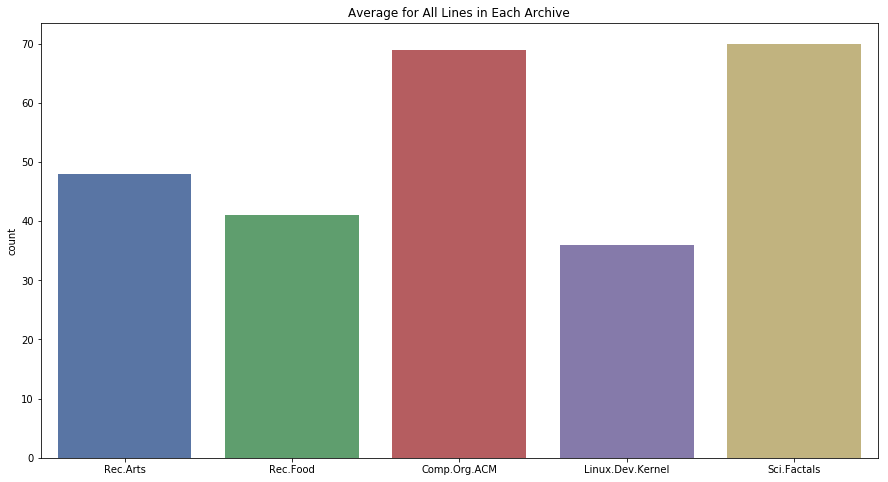

In [7]:
#Question 2 (Continued)

plt.figure(figsize=(15,8))
plot1 = sns.countplot(all_lines, palette="deep")
plot1.set_title("Average for All Lines in Each Archive")

### Question 2 (Continued)

Count plot of average lines in each archive is displayed above

In [8]:
#Question 3
import collections

#rec.arts.origami.txt
rec_arts_users_column = []
rec_arts_top_users =[]

#rec.food.chocolate.txt
rec_food_users_column = []
rec_food_top_users =[]

#comp.org.acm.txt
comp_org_users_column = []
comp_org_top_users =[]

#linux.dev.kernel.txt
linux_dev_users_column = []
linux_dev_top_users =[]

#sci.fractals.txt
sci_users_column = []
sci_top_users =[]

def topUsers(fileName, usersColumn, topUsers):
    with open(fileName, "r") as dataIn:  

        for i in dataIn:
            #m = re.match(r"^(From:)", i)
            m = re.match(r"^(From:)..*>$", i)

            if m:
                clean = i.strip('\n')
                usersColumn.append(clean)

    topUsers = collections.Counter(usersColumn).most_common(5)
 
    return topUsers


## Question 3

First, all the necessary list names are initialized. Then, we create a function called **topUsers** which takes in 3 values: *fileName, usersColumn, topUsers*
* fileName - is used to specify which file needs to be opened
* userColumn - is used to specify in which list **Form:** entries will be stored.
* topUsers - is used to store 5 most common user names in from usersColumn list

All of the lists items that begin with **From:** are stored in userColumn. To get the 5 most common names of the list, the *collections.Counter* function is used. topUsers list is returned

In [9]:
#Question 3 (Continued)
#   * indicated that there are more that one element, and the separate the by new line (sep="\n")

print ("Rec.Arts",*topUsers("rec.arts.origami.txt", rec_arts_users_column, rec_arts_top_users), sep="\n")
print()
print ("Rec.Food",*topUsers("rec.food.chocolate.txt", rec_food_users_column, rec_food_top_users), sep="\n")
print()
print ("Comp.Org.ACM",*topUsers("comp.org.acm.txt", comp_org_users_column, comp_org_top_users), sep="\n")
print()
print ("Linux.Dev.Kernel",*topUsers("linux.dev.kernel.txt", linux_dev_users_column, linux_dev_top_users), sep="\n")
print()
print ("Sci.Fractals",*topUsers("sci.fractals.txt", sci_users_column, sci_top_users), sep="\n")

Rec.Arts
('From: John Andrisan <Andrisan@pacbell.net>', 157)
('From: Matthias Gutfeldt <worte@gmx.at>', 93)
('From: Matthias Gutfeldt <anaesthe@dkf5.unibe.ch>', 87)
('From: Matthias Gutfeldt <tanjit@bboxbbs.ch>', 63)
('From: Lar <fresco@sentex.net>', 52)

Rec.Food
('From: Mark Thorson <nospam@sonic.net>', 184)
('From: "Janet Puistonen" <boxhill@verizon.net>', 148)
('From: Davida Chazan - The Chocolate Lady <7zcm9001@sneakemail.com>', 112)
('From: The Chocolate Archives <faq@choco.com>', 93)
('From: Johnson <jmjohnsn@sprynet.com>', 93)

Comp.Org.ACM
('From: "natty2006@gmail.com" <natty2006@gmail.com>', 75)
('From: Joe Katz <JOEKATZ@ACMVM.BITNET>', 38)
('From: Jose Antonio Moreno Zamora <joseanmo@BA.UNEX.ES>', 26)
('From: Bulent Murtezaoglu <bm@acm.org>', 25)
('From: Tom Worthington <tomw@acslink.net.au>', 22)

Linux.Dev.Kernel
('From: Alan Cox <alan@cymru.net>', 506)
('From: Bryn Paul Arnold Jones <bpaj@gytha.demon.co.uk>', 438)
('From: "Ulrich Windl" <Ulrich.Windl@rz.uni-regensburg.de>

### Question 3 (Continued)

To display top 5 users for each file, we are calling function *topUsers* and assign proper values. Also, in print() we are user \* which calls each value separately from returning list and allows it to be printed in separate lines.  

In [40]:
#Question 4

agent_column =[]

def top15(fileName):
    with open(fileName, "r") as dataIn:  

            for i in dataIn:
        
                m = re.match(r"^(User-Agent:)", i)

                m1 = re.match(r"^(X-HTTP-UserAgent:)", i)

                if m:
                    clean = i.strip('\n')

                    #Remove User-Agent
                    clean1 = re.sub(r"^(User-Agent:)",'',clean)

                    #Remove everything after /
                    clean2 = re.sub(r'(/).*','',clean1)

                    #Remove all digits after space
                    clean3 = clean = re.sub(r'( \d).*','',clean2)
                    clean3 = clean3.strip()

                    agent_column.append(clean3)

                elif m1:
                    clean = i.strip('\n')

                    #Remove User-Agent
                    clean1 = re.sub(r"^(X-HTTP-UserAgent:)",'',clean)

                    #Remove everything after /
                    clean2 = re.sub(r'(/).*','',clean1)

                    #Remove all digits after space
                    clean3 = clean = re.sub(r'( \d).*','',clean2)
                    clean3 = clean3.strip()

                    agent_column.append(clean3)
              
                

## Question 4

At first, *agent_column* is created to be empty. All of the information about agent(browsers) will be appended to this this list. Then, function *top15* is created which only takes in a *fileName* parameter. Then, with the help of for loop we are able to go through the declared file and search for lines that begin with: **User-Agent:** or **X-HTTP-UserAgent:** and retrieve those values. In order to get formatted names of browsers, retuned values must be stripped. Then, **User-Agent:** or **X-HTTP-UserAgent:** and anything after '/' are removed from list items. This way we are able to get well formatted names of the internet agents(browsers)


In [41]:
#Question 4 (Continued)
top15("rec.arts.origami.txt")
top15("rec.food.chocolate.txt")
top15("comp.org.acm.txt")
top15("linux.dev.kernel.txt")
top15("sci.fractals.txt")

### Question 4 (Continued)

**top15** is executed for each text file that we are performing analysis for. All of the values are appended to the **agent_column**

In [46]:
#Question 4 (Continued)
top15Users = collections.Counter(agent_column).most_common(15)
top15Users

[('Mozilla', 4345),
 ('G2', 3354),
 ('Mozilla Thunderbird', 922),
 ('Xnews', 450),
 ('tin', 380),
 ('KNode', 364),
 ('slrn', 286),
 ('Thunderbird', 218),
 ('MT-NewsWatcher', 200),
 ('Gnus', 179),
 ('Pan', 177),
 ('Thoth', 110),
 ('YA-NewsWatcher', 92),
 ('MacSOUP', 61),
 ('Microsoft-Outlook-Express-Macintosh-Edition', 52)]

### Question 4 (Continued)

**top15Users** is a new lists that stores the value of 15 most common internet agents(browsers)


In [42]:
#Question 4 (Continued)
# get top5Users list and append each user to new list a number of times it is displayed
top15_display = []
for i in top15Users:
    
    for b in range(i[1]):
        top15_display.append(i[0])


### Question 4 (Continued)

New list **top15_display** is created. And because our **top15Users** already has counted values (as shown below)

     ('Mozilla', 4345),
     ('G2', 3354),
     ('Mozilla Thunderbird', 922),
     ('Xnews', 450),
     ...

we must change the layout of it in order to have counting values for *countplot*. To fix this problem, we make a double for loop with take in a range() value of second element (i[1]) and appends that number of browser names (i[0]) to the new list

Text(0.5,1,'Top 15 Agents(Browsers) Used in All Files')

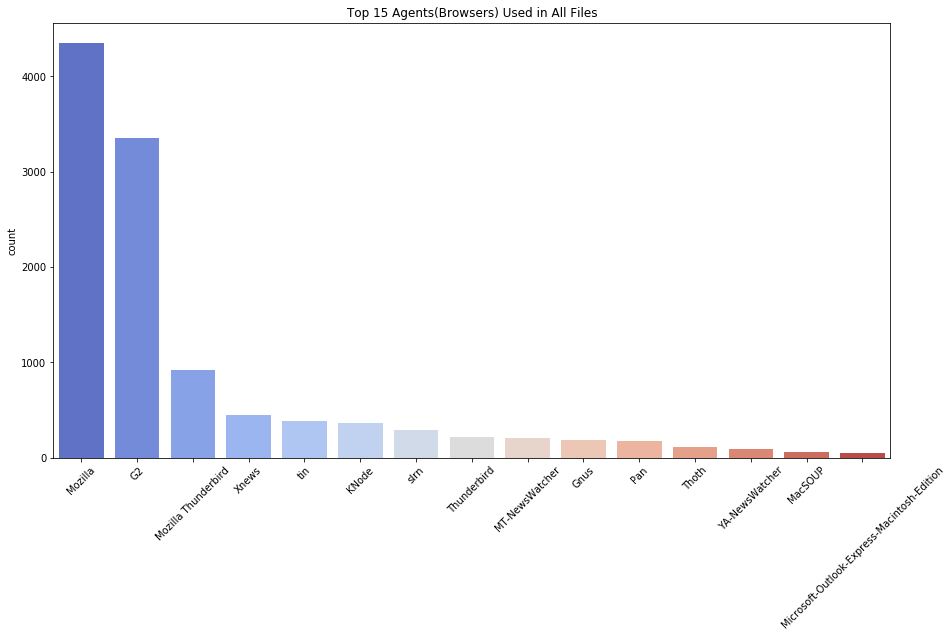

In [47]:
#Question 4 (Continued)
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
plot1 = sns.countplot(top15_display, palette="coolwarm")
plot1.set_title("Top 15 Agents(Browsers) Used in All Files")

### Question 4 (Continued)

Countplot of top 15 brosers throughout all files is displayed above

In [15]:
#Qustion 5

#rec.arts.origami.txt
rec_arts_df = []

#rec.food.chocolate.txt
rec_food_df = []

#comp.org.acm.txt
comp_org_df = []

#linux.dev.kernel.txt
linux_dev_df = []

#sci.fractals.txt
sci_df = []



def yearGraph(fileName):
    with open(fileName, "r") as dataIn:  

        sample = []

        for i in dataIn:
            m = re.match(r"^(Date: )", i)

            if m:
                clean = i.strip()
                clean1 = re.sub(r'(Date: )','',clean)

                clean2 = re.sub(r'(:).*','',clean1)

                clean3 =re.findall(r"[0-9]{4}", clean2)
                sample.append(clean3)


    #Remove None values
    dates_fixed = []
    dates_fixed = list(filter(None, sample))

    str_dates=[]
    for i in dates_fixed:

        m = str(i)
        str_dates.append(m)

    #used to convert all elemetents to the list 
    dates_int =[]
    for i in str_dates:

        o = i.strip("[]''")
        dates_int.append(o)

    dates_int = list(filter(None, dates_int))

    
    sample_list_dates = []
    for i in dates_int:
        #dates_column.append(int(i))
        sample_list_dates.append(int(i))


    year_display = [year for year, year_count in collections.Counter(sample_list_dates).most_common()]
    year_count = [year_count for year, year_count in collections.Counter(sample_list_dates).most_common()]
    
    
    #return year_display
    
    df = pd.DataFrame({
    "Year" : year_display,
    "Messages": year_count
    })
    
    df = df.sort_values(by=['Year'])
    df = df[df['Year']> 1990]

    return df

## Question 5 

First, all of the necessary list names are initialized. New function **yearGraph** is created which takes in only *fileName* value. When function is executed and appropriate file name is passed, all of the line that begin with **Date:** will be recorded, and cleaned. Then, with the help of regular expressions we are able to append all of the values that contain exactly 4 digits to *sample* list. Furthermore, after cleaning values, empty entries appear in the sample list to get rid of them we can execute this statement: `dates_fixed = list(filter(None, sample))` In order to count the values for this list it must be converted to an integer. After all this is done, we are able to calculate most common years by using list comprehension and collections.Counter:

    year_display = [year for year, year_count in collections.Counter(sample_list_dates).most_common()]
    year_count = [year_count for year, year_count in collections.Counter(sample_list_dates).most_common()]
   
Finally, we create pd.DataFrame which is returned after function **yearGraph** is executed
    

In [16]:
#Question 5 (Continued)
rec_arts_df = yearGraph("rec.arts.origami.txt")
rec_food_df = yearGraph("rec.food.chocolate.txt")
comp_org_df = yearGraph("comp.org.acm.txt")
linux_dev_df = yearGraph("linux.dev.kernel.txt")
sci_df = yearGraph("sci.fractals.txt")


### Question 5 (Continued)

**yearGraph** is executed for each text file that we are preforming analysis for. Since this function is returning dataFrame we must assign to a variable. 

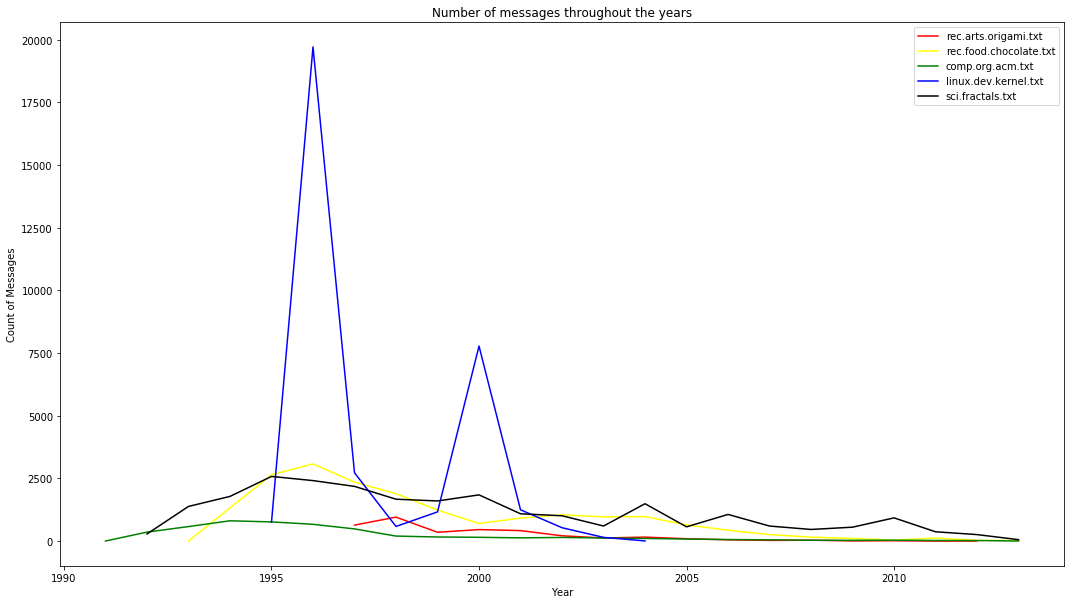

In [17]:
#Question 5 (Continued)
plt.figure(figsize=(18,10))

arts, = plt.plot(rec_arts_df ['Year'],rec_arts_df ['Messages'], color="red")
food, = plt.plot(rec_food_df['Year'],rec_food_df['Messages'], color="yellow")
comp, = plt.plot(comp_org_df['Year'],comp_org_df['Messages'], color="green")
linux, = plt.plot(linux_dev_df['Year'],linux_dev_df['Messages'], color="blue")
sci, = plt.plot(sci_df['Year'],sci_df['Messages'], color="black")

plt.legend(loc=1, prop={'size': 12})
plt.legend([arts, food, comp, linux, sci], ['rec.arts.origami.txt', 'rec.food.chocolate.txt', 
                                            'comp.org.acm.txt', 'linux.dev.kernel.txt', 'sci.fractals.txt'])

#plt.legend([arts, food], ['Line Up', 'Line Down'])
plt.title('Number of messages throughout the years')
plt.xlabel('Year')
plt.ylabel('Count of Messages')


plt.show()


### Question 5 (Continued)

Based of the graph above, we can clearly see that the amount of messages continuously decreased in each discussion as the use of internet grew. The most unusual plot comes from *linux.dev.kernel.txt* file. As we can see the number of messages significantly increased from 1995 to 1996 and then, interestingly enough it the amount of messages dropped almost as much as it increased. Several years later, linux.dev.kernel had a significant increase of messages between 1999-2000 and then dropped in 2001. 

After taking more time to look at the graph, we can see that 4 out of 5 discussion are having almost the same pattern. The interest of discussions was increasing for a year or two and then was continuously going down as the internet evolved and well developed applications emerged

In [48]:
#Question 6
def wordCloud(fileName):
    
    with open(fileName, "r") as dataIn:

        text = []
        for i in dataIn:

            text.append(i)

    clean_list = []
    for i in text:
        clean = i.strip().strip("> --")

        clean = re.sub(r'^(From.*)','',clean)
        clean = re.sub(r'^(X-Google-Thread:.*)','',clean)
        clean = re.sub(r'^(X-Google-Attributes:.*)','',clean)
        clean = re.sub(r'^(X-Google-Language:.*)','',clean)
        clean = re.sub(r'^(Path:.*)','',clean)

        clean = re.sub(r'^(From:.* )','',clean)
        clean = re.sub(r'^(Newsgroups:.*)','',clean)
        clean = re.sub(r'^(Subject:.*)','',clean)
        clean = re.sub(r'^(Date:.*)','',clean)
        clean = re.sub(r'^(Organization:.*)','',clean)

        clean = re.sub(r'^(Lines:.*)','',clean)
        clean = re.sub(r'^(Message-ID:.*)','',clean)
        clean = re.sub(r'^(NNTP-Posting-Host:.*)','',clean)
        clean = re.sub(r'^(Content-Type:.*)','',clean)
        clean = re.sub(r'^(Content-Transfer-Encoding:.*)','',clean)

        clean = re.sub(r'^(X-Trace:.*)','',clean)
        clean = re.sub(r'^(X-Complaints-To:.*)','',clean)
        clean = re.sub(r'^(NNTP-Posting-Date:.*)','',clean)
        clean = re.sub(r'^(Injector-Info:.*)','',clean)
        clean = re.sub(r'^(User-Agent:.*)','',clean)

        clean = re.sub(r'^(X-URL:.*)','',clean)
        clean = re.sub(r'^(Xref:.*)','',clean)
        clean = re.sub(r'^(Mime-Version:.*)','',clean)
        clean = re.sub(r'^(MIME-Version:.*)','',clean)
        clean = re.sub(r'^(X-Trace-PostClient-IP:.*)','',clean)

        clean = re.sub(r'^(References:.*)','',clean)
        clean = re.sub(r'^(X-Newsreader:.*)','',clean)
        clean = re.sub(r'^(X-Priority:.*)','',clean)
        clean = re.sub(r'^(X-HTTP-Via.*)','',clean)
        clean = re.sub(r'^(X-HTTP-UserAgent:.*)','',clean)

        clean = re.sub(r'^(In-Reply-To.*)','',clean)
        clean = re.sub(r'^(X-Accept-Language:.*)','',clean)
        clean = re.sub(r'^(X-MSMail-Priority:.*)','',clean)
        clean = re.sub(r'^(X-MimeOLE.*)','',clean)
        clean = re.sub(r'^(Reply-To:.*)','',clean)

        clean = re.sub(r'^(Complaints-To:.*)','',clean)
        clean = re.sub(r'^(Injection-Info:.*)','',clean)
        clean = re.sub(r'^(posting-account.*)','',clean)
        clean = re.sub(r'^(X-Deja-AN:.*)','',clean)
        clean = re.sub(r'^(OriRef.*)','',clean)

        clean = re.sub(r'^(X-Server-Date:.*)','',clean)
        clean = re.sub(r'^(Sender:.*)','',clean)
        clean = re.sub(r'^(OriRef.*)','',clean)
        clean = re.sub(r'^(X-Received:.*)','',clean)
        clean = re.sub(r'^(Received:.*)','',clean)

        clean = re.sub(r'^(Injection-Date:.*)','',clean)
        clean = re.sub(r'^(X-Google-NewGroupId:.*)','',clean)
        clean = re.sub(r'^(X-Originating-IP:.*)','',clean)
        clean = re.sub(r'^(X-Usenet-Provider:.*)','',clean)
        clean = re.sub(r'^(Cancel-Lock:.*)','',clean)

        clean = re.sub(r'^(logging-data=.*)','',clean)
        clean = re.sub(r'^(X-Abuse-and-DMCA-Info:.*)','',clean)
        clean = re.sub(r'^(X-Abuse-and-DMCA-Info:.*)','',clean)
        clean = re.sub(r'^(X-Postfilter:.*)','',clean)
        clean = re.sub(r'^(X-Original-Lines:.*)','',clean)

        clean = re.sub(r'^(X-Original-Bytes:.*)','',clean)
        clean = re.sub(r'^(X-Google-ArrivalTime:.*)','',clean)
        clean = re.sub(r'^(PST.*)','',clean)
        clean = re.sub(r'^(X-X-Sender:.*)','',clean)
        clean = re.sub(r'^(X-Original-Lines:.*)','',clean)
        
        clean = re.sub(r'^(X-Sender:.*)','',clean)
        clean = re.sub(r'(nbsp)','',clean)
        

        clean_list.append(clean)


    clean_list = list(filter(None, clean_list))    
    clean_text = ' '.join(clean_list)


    #Creating world cloud
    wc = WordCloud(width=800, height=600, margin=5).generate(clean_text)

    plt.figure(figsize=(8,6), dpi=100)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

## Question 6 

Function **wordCloud** is created which takes in the value of *fileName*. Then, each line from selected text file is appended to **text** variable. After text of appropraite file is appended, we use the for loop to iterate through **text** list and remove all of the space, '<',and all of the manually metadata phrases that are anything else but the text of the message. All of these values appende to the **clean_list**. To properly format this list we remove all of the empty values with `clean_list = list(filter(None, clean_list))` and join the text `clean_text = ' '.join(clean_list)` leaving no line breaks. Finally WordCloud function is called and assigned to plt.figure()

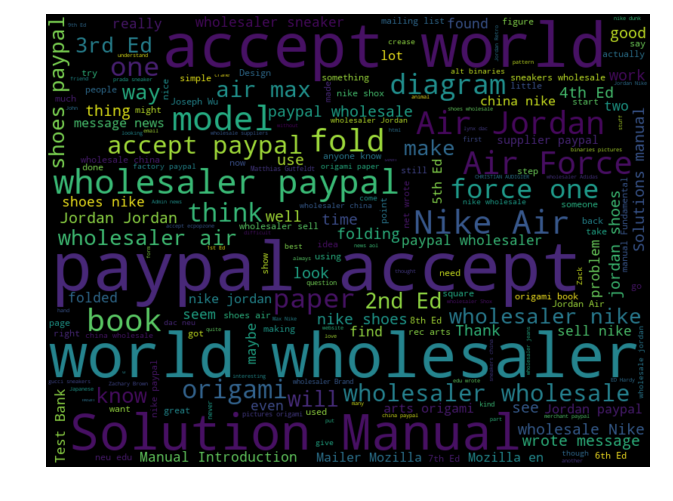

In [49]:
#Question 6 (Continued)
wordCloud("rec.arts.origami.txt")

### Question 6 (Continued): rec.arts.origami.txt

Just looking at the WordCloud picture of **rec.arts.origami.txt** it is hard to say what this discussion was about. Even though the name of the file indicates that the topic should be related to arts and origami (art of paper folding), we are many words that are related to sales, nike, paypal, and Air Jordan that are not related to origami. This particular WordCloud does not serve as a good fingerprint


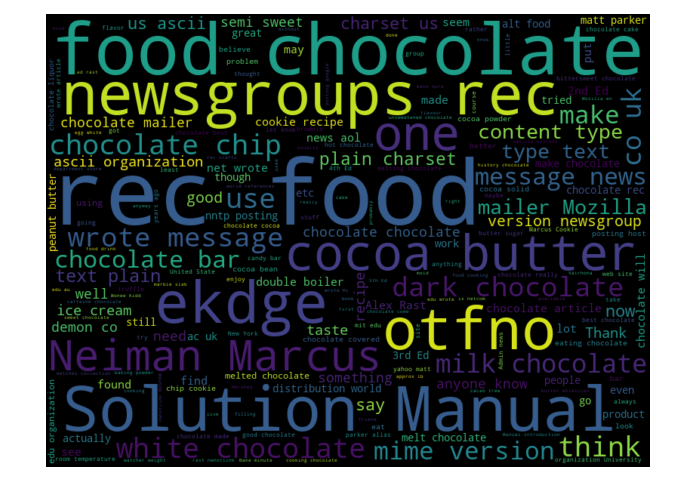

In [50]:
#Question 6 (Continued)
wordCloud("rec.food.chocolate.txt")

### Question 6 (Continued): rec.food.chocolate.txt

Based on **rec.food.chocolate.txt** WordCloud user would be able to guess that the topic of this discussion is related to food, especially chocolate. There are several different words that describe food, such as: food, chocolate, chocolate chip, milk chocolate, white chocolate, cocoa, butter, dark chocolate, and more. This WordCloud server well as a fingerprint


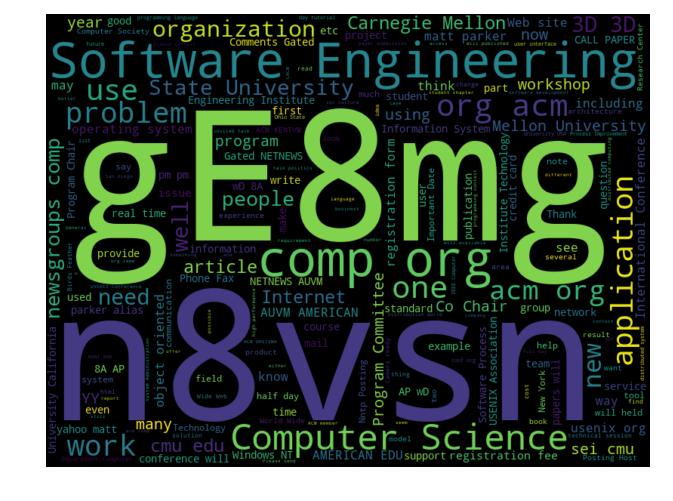

In [51]:
#Question 6 (Continued)
wordCloud("comp.org.acm.txt")

### Question 6 (Continued): comp.org.acm.txt
By looking at the WordCloud displayed above, user would be able to describe the main topic of **comp.org.acm.txt**. Phrases and words, such as: comp org, software engineering, application, computer science, work, edu, internet, acm. All of the mentioned phrases are related to computer science and technology

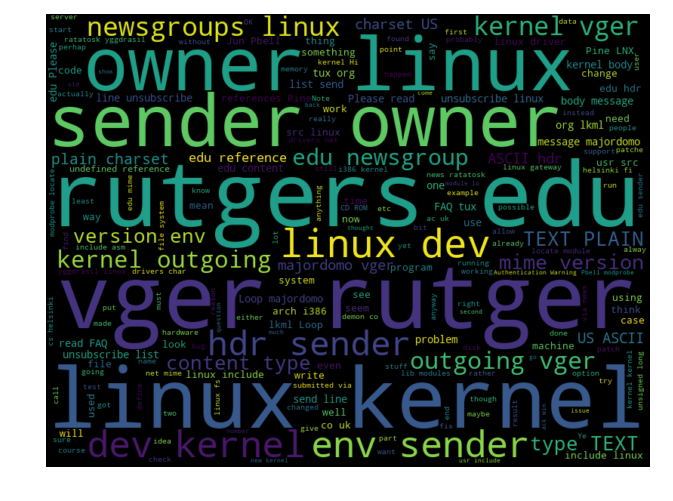

In [52]:
#Question 6 (Continued)
wordCloud("linux.dev.kernel.txt")

### Question 6 (Continued): linux.dev.kernel.txt

By simply looking at **linux.dev.kernel.txt** WordCloud it might be hard to understand what is the main topic of this particular discussion. However, after taking some time and looking more carefully it is easy to understand that the main topic is related Linux operating system. It does take more time to recognize the main phrases of this WordCloud but regardless of that it does serve as a good fingerprint of the discussion 

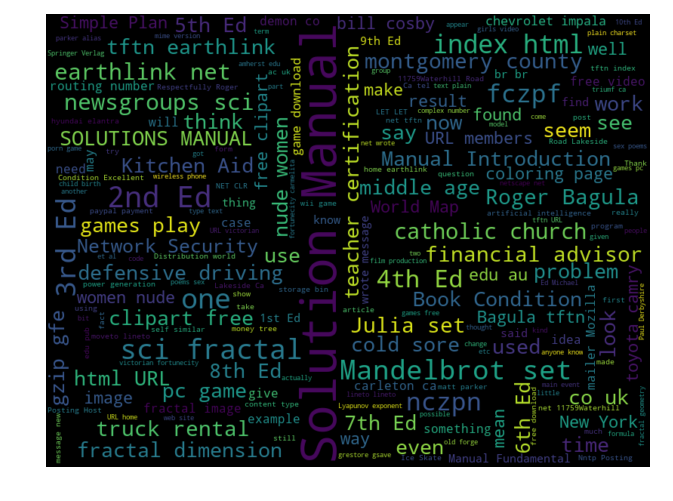

In [53]:
#Question 6 (Continued)
wordCloud("sci.fractals.txt")

### Question 6 (Continued): sci.fractals.txt

**sci.fractals.txt** WordCloud does have many words that stand out in the figure. There are plenty of words that are medium size and easy readable which could mean that there are many different topics discussed in this forum. Also, it is fairly hard to determine which is the main topic of this text file. Most of the words and phrases are related to the science, education, and technology but there is no certainty which is the main topic. This WordCloud does not provide good representation of the main topic of the **sci.fractals.txt** file.